In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Debug version - let's check each file individually
# file_paths = [
#     '/raid/home/yoyowu/scProSpatial/scipenn_results_bmmc/scipenn_results_few_shot_summary.csv',
#     '/raid/home/yoyowu/spatialpro/rna2prot_results/may24_2025_bmmc_few_shot_bmmc_few_shot_results.csv',
#     '/raid/home/yoyowu/spatialpro/scTranslator_results/may22_scTrans_bmmc_few_bmmc_few_shot_results.csv',
#     '/raid/home/yoyowu/spatialpro/totalvi_results_bmmc_fixed/totalvi_results_few_shot_summary.csv'
# ]
# file_paths = [
#     '/raid/home/yoyowu/spatialpro/scipenn_results_pbmc/scipenn_results_few_shot_summary.csv',
#     '/raid/home/yoyowu/spatialpro/rna2prot_results/may25_2025_pbmc_fewshot_pbmc_few_shot_results.csv',
#     '/raid/home/yoyowu/spatialpro/scTranslator_results/may25_scTrans_pbmc_fewshot_pbmc_few_shot_results.csv',
#     '/raid/home/yoyowu/spatialpro/totalvi_results_pbmc_fixed/totalvi_results_few_shot_summary.csv'
# ]
file_paths = [
    '/raid/home/yoyowu/spatialpro/scipenn_results_liver/scipenn_results_few_shot_summary.csv',
    '/raid/home/yoyowu/spatialpro/rna2prot_results/may25_2025_liver_fewshot_liver_few_shot_results.csv',
    '/raid/home/yoyowu/spatialpro/scTranslator_results/may25_scTrans_liver_fewshot_liver_few_shot_results.csv',
    '/raid/home/yoyowu/spatialpro/totalvi_results_liver_fixed/totalvi_results_few_shot_summary.csv'
]
# Check each file individually
for file_path in file_paths:
    print(f"\n=== Checking {file_path} ===")
    try:
        # Check if file exists
        import os
        if os.path.exists(file_path):
            print(f"✓ File exists")
            
            # Try to read the file
            df = pd.read_csv(file_path)
            print(f"✓ File read successfully")
            print(f"  Shape: {df.shape}")
            print(f"  Columns: {df.columns.tolist()}")
            print(f"  First few rows:")
            print(df.head())
            
            # Determine method name
           
            if 'rna2prot' in file_path.lower():
                method = 'scProSpatial (ours)'
            elif 'sctranslator' in file_path.lower():
                method = 'scTranslator'
            elif 'scipenn' in file_path.lower():
                method = 'sciPenn'
            elif 'totalvi' in file_path.lower():
                method = 'TotalVI'
            else:
                method = 'Unknown'
            
            print(f"  Method identified as: {method}")
            
        else:
            print(f"✗ File does not exist")
            
    except Exception as e:
        print(f"✗ Error reading file: {e}")

# Now let's run the corrected version of the plotting code
def read_and_process_file(file_path):
    try:
        # Check if file exists first
        import os
        if not os.path.exists(file_path):
            print(f"File does not exist: {file_path}")
            return None
            
        df = pd.read_csv(file_path)
        print(f"Successfully read {file_path}: shape {df.shape}")
        
        # Determine method name from file path
        
        if 'rna2prot' in file_path.lower():
            method = 'scProSpatial (ours)'
            # Rename columns to match unified naming
            if 'test_ccc' in df.columns:
                df = df.rename(columns={
                    'test_ccc': 'cosine_sim',
                    'test_pearson': 'pearson',
                    'test_spearman': 'spearman'
                })
        elif 'sctranslator' in file_path.lower():
            method = 'scTranslator'
            # Rename columns to match unified naming
            if 'test_ccc' in df.columns:
                df = df.rename(columns={
                    'test_ccc': 'cosine_sim',
                    'test_pearson': 'pearson',
                    'test_spearman': 'spearman'
                })
        elif 'scipenn' in file_path.lower():
            method = 'sciPenn'
            # Rename columns to match unified naming
            if 'cosine_similarity' in df.columns:
                df = df.rename(columns={
                    'cosine_similarity': 'cosine_sim',
                    'pearson_correlation': 'pearson',
                    'spearman_correlation': 'spearman'
                })
        elif 'totalvi' in file_path.lower():
            method = 'TotalVI'
            # Rename columns to match unified naming
            if 'cosine_similarity' in df.columns:
                df = df.rename(columns={
                    'cosine_similarity': 'cosine_sim',
                    'pearson_correlation': 'pearson',
                    'spearman_correlation': 'spearman'
                })
        else:
            method = 'Unknown'
        
        df['method'] = method
        print(f"Method assigned: {method}")
        return df
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None

# Read all files
dfs = []
for file_path in file_paths:
    df = read_and_process_file(file_path)
    if df is not None:
        dfs.append(df)
        print(f"Added to list: {df['method'].iloc[0]} with {len(df)} rows")

print(f"\nTotal dataframes collected: {len(dfs)}")
if dfs:
    for i, df in enumerate(dfs):
        print(f"DataFrame {i}: {df['method'].iloc[0]} - {len(df)} rows")


=== Checking /raid/home/yoyowu/spatialpro/scipenn_results_liver/scipenn_results_few_shot_summary.csv ===
✓ File exists
✓ File read successfully
  Shape: (5, 8)
  Columns: ['seed', 'cosine_similarity', 'custom_mse', 'pearson_correlation', 'spearman_correlation', 'split', 'few_shot_frac', 'leave_out_idx']
  First few rows:
   seed  cosine_similarity  custom_mse  pearson_correlation  \
0  1105           0.712820    0.022121             0.636905   
1  1105           0.708182    0.022072             0.630998   
2  1105           0.699025    0.027383             0.618805   
3  1105           0.682493    0.032127             0.597814   
4  1105           0.668255    0.051503             0.579963   

   spearman_correlation     split  few_shot_frac  leave_out_idx  
0              0.603668  few_shot          0.100            NaN  
1              0.593966  few_shot          0.050            NaN  
2              0.582155  few_shot          0.020            NaN  
3              0.552153  few_shot

Available columns: ['seed', 'cosine_sim', 'custom_mse', 'pearson', 'spearman', 'split', 'few_shot_frac', 'leave_out_idx', 'method', 'epoch', 'train_loss', 'train_ccc', 'train_pearson', 'train_spearman', 'test_loss', 'time', 'dataset']
Methods found: ['sciPenn' 'scProSpatial (ours)' 'scTranslator' 'TotalVI']


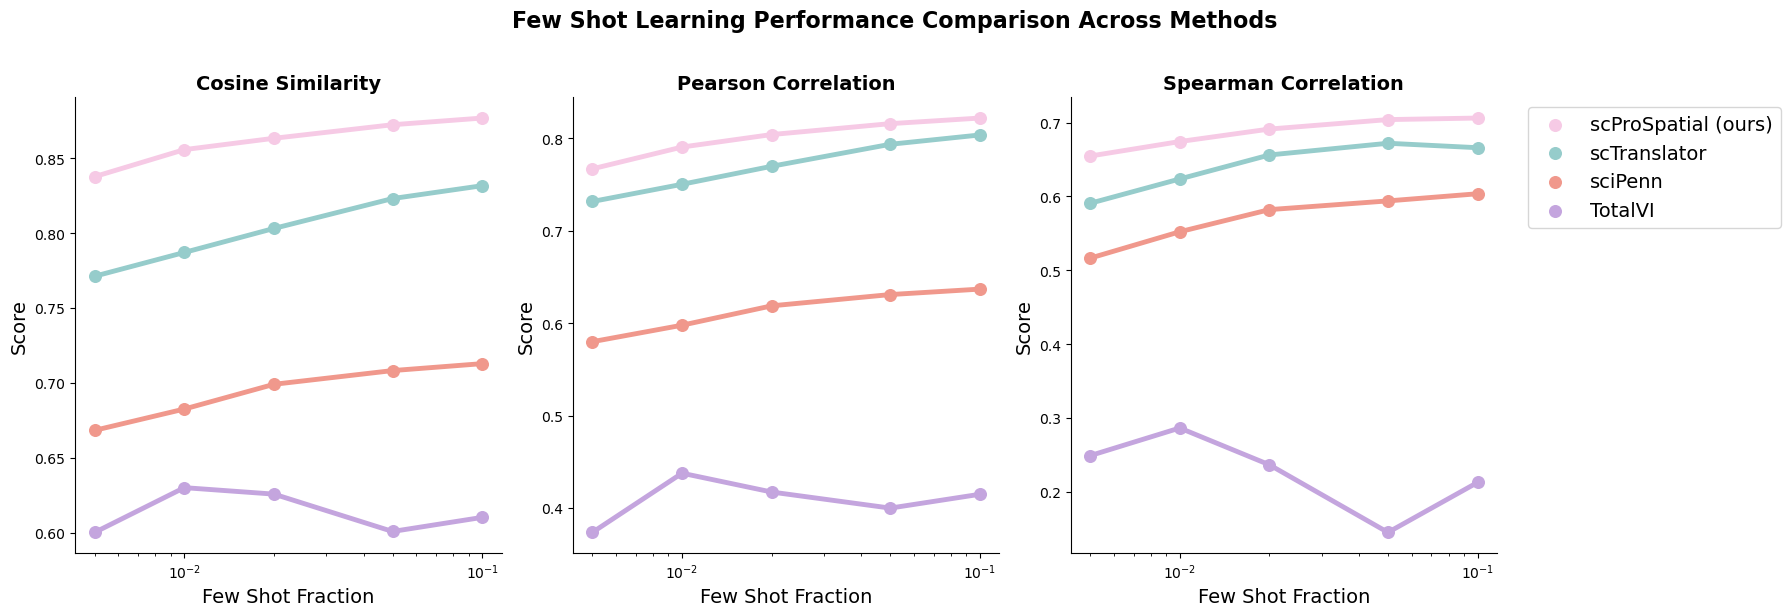

In [2]:
# Combine all dataframes
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    
    # Print column names to debug
    print("Available columns:", combined_df.columns.tolist())
    print("Methods found:", combined_df['method'].unique())
    
    # Determine the few shot fraction column
    few_shot_col = None
    for col in ['few_shot_frac', 'few_shot_fraction', 'fraction', 'shot_fraction']:
        if col in combined_df.columns:
            few_shot_col = col
            break
    
    if few_shot_col is None:
        print("Warning: No few shot fraction column found. Using index as x-axis.")
        combined_df['few_shot_frac'] = combined_df.index
        few_shot_col = 'few_shot_frac'
    
    # Define colors for each method
    colors = {
        'scProSpatial (ours)': '#f6cae5',
        'scTranslator': '#96cccb', 
        'sciPenn': '#f0988c',
        'TotalVI': '#c4a5de'
    }
    
    # Define the desired legend order
    legend_order = ['scProSpatial (ours)', 'scTranslator', 'sciPenn', 'TotalVI']
    
    # Create the three separate plots
    metrics = ['cosine_sim', 'pearson', 'spearman']
    metric_names = ['Cosine Similarity', 'Pearson Correlation', 'Spearman Correlation']
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Few Shot Learning Performance Comparison Across Methods', 
                 fontsize=16, fontweight='bold', y=1.02)
    
    for i, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
        ax = axes[i]
        
        # Plot each method in the specified order
        for method in legend_order:
            if method in combined_df['method'].unique():
                method_data = combined_df[combined_df['method'] == method]
                
                if metric in method_data.columns and few_shot_col in method_data.columns:
                    # Sort by few shot fraction for better line plotting
                    method_data = method_data.sort_values(few_shot_col)
                    
                    ax.scatter(method_data[few_shot_col], method_data[metric], 
                              color=colors.get(method, '#888888'), 
                              label=method, s=70, alpha=1.0)
                    
                    # Add connecting lines
                    ax.plot(method_data[few_shot_col], method_data[metric], 
                           color=colors.get(method, '#888888'), alpha=1.0, linewidth=3.5)
        
        ax.set_title(metric_name, fontsize=14, fontweight='bold')
        ax.set_xlabel('Few Shot Fraction', fontsize=14)
        ax.set_ylabel('Score', fontsize=14)
        
        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Set x-axis to log scale if fractions are small
        if combined_df[few_shot_col].max() <= 1.0:
            ax.set_xscale('log')
        
        # Only show legend on the last plot with custom order
        if i == 2:
            # Get handles and labels in the order we want
            handles = []
            labels = []
            for method in legend_order:
                for handle, label in zip(ax.get_legend_handles_labels()[0], ax.get_legend_handles_labels()[1]):
                    if label == method:
                        handles.append(handle)
                        labels.append(label)
            ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    # Save the figure
    fig.savefig('/raid/home/yoyowu/spatialpro/plots/liver_few_shot_comparison_scatter.png', 
                dpi=300, bbox_inches='tight')

Successfully read /raid/home/yoyowu/spatialpro/rna2prot_results/may25_2025_liver_leaveout_liver_few_leave_out_results.csv: shape (25, 13)
Method assigned: scProSpatial (ours), rows after filtering: 5
Added: scProSpatial (ours) - Liver with 5 rows
Successfully read /raid/home/yoyowu/spatialpro/rna2prot_results/may25_2025_pbmc_leaveout_pbmc_few_leave_out_results.csv: shape (25, 13)
Method assigned: scProSpatial (ours), rows after filtering: 5
Added: scProSpatial (ours) - PBMC with 5 rows
Successfully read /raid/home/yoyowu/spatialpro/scipenn_results_liver/scipenn_results_few_leave_out_summary.csv: shape (5, 8)
Method assigned: sciPenn, rows after filtering: 5
Added: sciPenn - Liver with 5 rows
Successfully read /raid/home/yoyowu/spatialpro/scipenn_results_pbmc/scipenn_results_few_leave_out_summary.csv: shape (5, 8)
Method assigned: sciPenn, rows after filtering: 5
Added: sciPenn - PBMC with 5 rows
Successfully read /raid/home/yoyowu/spatialpro/scTranslator_results/may22_scTrans_liver_few

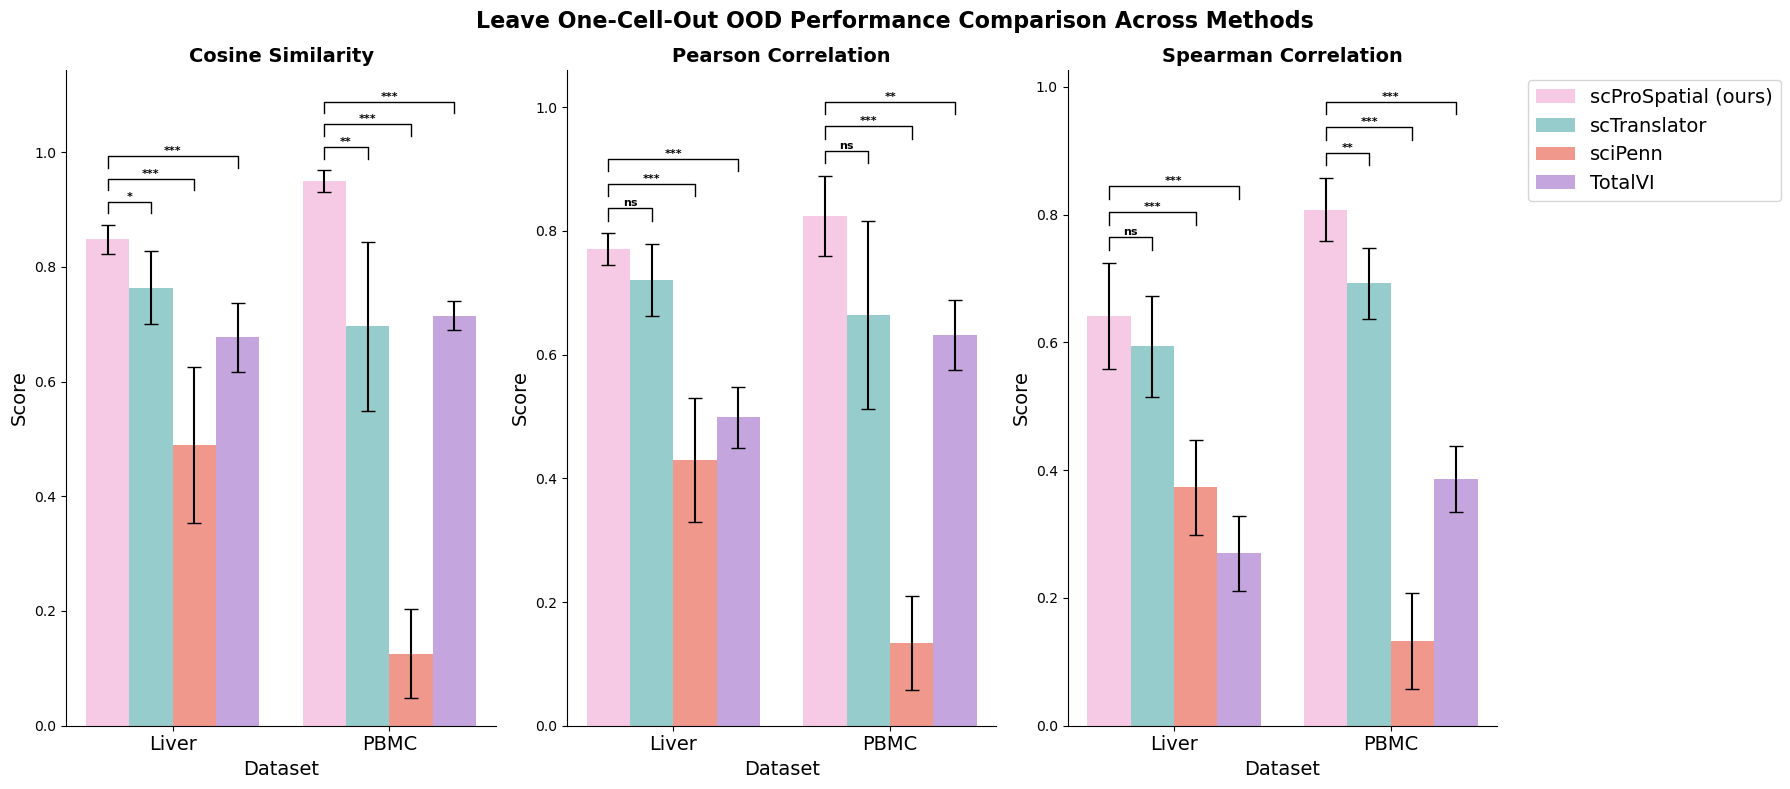


Leave-Out Setting Summary Statistics:

COSINE_SIM:
  scProSpatial (ours): 0.8985 ± 0.0504
  scTranslator: 0.7298 ± 0.0338
  sciPenn: 0.3077 ± 0.1822
  TotalVI: 0.6959 ± 0.0186

PEARSON:
  scProSpatial (ours): 0.7974 ± 0.0269
  scTranslator: 0.6924 ± 0.0283
  sciPenn: 0.2820 ± 0.1481
  TotalVI: 0.5656 ± 0.0665

SPEARMAN:
  scProSpatial (ours): 0.7244 ± 0.0831
  scTranslator: 0.6432 ± 0.0492
  sciPenn: 0.2530 ± 0.1201
  TotalVI: 0.3282 ± 0.0582


Statistical Comparison (p-values from t-tests):
Comparing scProSpatial (ours) vs other methods:

COSINE_SIM:
  Liver:
    vs scTranslator: p = 0.023871 *
    vs sciPenn: p = 0.000407 ***
    vs TotalVI: p = 0.000383 ***
  PBMC:
    vs scTranslator: p = 0.005272 **
    vs sciPenn: p = 0.000000 ***
    vs TotalVI: p = 0.000000 ***

PEARSON:
  Liver:
    vs scTranslator: p = 0.118178 ns
    vs sciPenn: p = 0.000081 ***
    vs TotalVI: p = 0.000004 ***
  PBMC:
    vs scTranslator: p = 0.062176 ns
    vs sciPenn: p = 0.000000 ***
    vs TotalVI: p =

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

# Define file paths for all methods and datasets
file_paths = {
    'scProSpatial (ours)': {
        'Liver': '/raid/home/yoyowu/spatialpro/rna2prot_results/may25_2025_liver_leaveout_liver_few_leave_out_results.csv',
        'PBMC': '/raid/home/yoyowu/spatialpro/rna2prot_results/may25_2025_pbmc_leaveout_pbmc_few_leave_out_results.csv'
    },
    'sciPenn': {
        'Liver': '/raid/home/yoyowu/spatialpro/scipenn_results_liver/scipenn_results_few_leave_out_summary.csv',
        'PBMC': '/raid/home/yoyowu/spatialpro/scipenn_results_pbmc/scipenn_results_pbmc_few_leave_out_summary.csv'
    },
    'scTranslator': {
        'Liver': '/raid/home/yoyowu/spatialpro/scTranslator_results/may22_scTrans_liver_few_liver_few_leave_out_results.csv',
        'PBMC': '/raid/home/yoyowu/spatialpro/scTranslator_results/may26_scTrans_pbmc_leaveout_pbmc_few_leave_out_results.csv'
    },
    'TotalVI': {
        'Liver': '/raid/home/yoyowu/spatialpro/totalvi_results_liver_fixed/totalvi_results_few_leave_out_summary.csv',
        'PBMC': '/raid/home/yoyowu/spatialpro/totalvi_results_pbmc_fixed/totalvi_results_pbmc_few_leave_out_summary.csv'
    }
}

def read_and_process_file(file_path, method):
    """Read and process a CSV file, standardizing column names"""
    try:
        if not os.path.exists(file_path):
            print(f"File does not exist: {file_path}")
            return None
            
        df = pd.read_csv(file_path)
        print(f"Successfully read {file_path}: shape {df.shape}")
        
        # Standardize column names based on method
        if method in ['sciPenn', 'TotalVI']:
            # Rename columns to match unified naming
            if 'cosine_similarity' in df.columns:
                df = df.rename(columns={
                    'cosine_similarity': 'cosine_sim',
                    'pearson_correlation': 'pearson',
                    'spearman_correlation': 'spearman'
                })
        else:  # SpatialPro and scTranslator
            # Rename columns to match unified naming
            if 'test_ccc' in df.columns:
                df = df.rename(columns={
                    'test_ccc': 'cosine_sim',
                    'test_pearson': 'pearson',
                    'test_spearman': 'spearman'
                })
        
        # Filter for few_shot_frac = 0.1
        if 'few_shot_frac' in df.columns:
            df = df[df['few_shot_frac'] == 0.1]
        
        df['method'] = method
        print(f"Method assigned: {method}, rows after filtering: {len(df)}")
        return df
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None

def add_significance_bracket(ax, x1, x2, y, p_val, height_offset=0.02):
    """Add significance bracket between two bars"""
    # Determine significance level
    if p_val < 0.001:
        sig_text = "***"
    elif p_val < 0.01:
        sig_text = "**"
    elif p_val < 0.05:
        sig_text = "*"
    else:
        sig_text = "ns"
    
    # Draw the bracket
    ax.plot([x1, x1, x2, x2], [y, y + height_offset, y + height_offset, y], 
            color='black', linewidth=1)
    
    # Add significance text
    ax.text((x1 + x2) / 2, y + height_offset, sig_text, 
            ha='center', va='bottom', fontsize=8, fontweight='bold')

# Read all files
all_dfs = []
datasets = ['Liver', 'PBMC']

for method, dataset_files in file_paths.items():
    for dataset, file_path in dataset_files.items():
        df = read_and_process_file(file_path, method)
        if df is not None:
            df['dataset'] = dataset
            all_dfs.append(df)
            print(f"Added: {method} - {dataset} with {len(df)} rows")

# Combine all dataframes
if all_dfs:
    combined_df = pd.concat(all_dfs, ignore_index=True)
    print(f"\nCombined dataframe shape: {combined_df.shape}")
    print("Available columns:", combined_df.columns.tolist())
    print("Methods found:", combined_df['method'].unique())
    print("Datasets found:", combined_df['dataset'].unique())
else:
    print("No valid data files found.")
    exit()

# Define colors for each method
colors = ['#f6cae5', '#96cccb', '#f0988c', '#c4a5de']
methods = ['scProSpatial (ours)', 'scTranslator', 'sciPenn', 'TotalVI']

# Calculate means and standard errors for each method, dataset, and metric
metrics = ['cosine_sim', 'pearson', 'spearman']
metric_names = ['Cosine Similarity', 'Pearson Correlation', 'Spearman Correlation']

# Group by method, dataset, and leave_out_idx, then calculate statistics
summary_data = {}

for method in methods:
    summary_data[method] = {}
    for dataset in datasets:
        method_dataset_data = combined_df[(combined_df['method'] == method) & 
                                         (combined_df['dataset'] == dataset)]
        
        if len(method_dataset_data) > 0:
            summary_data[method][dataset] = {}
            
            # Group by leave_out_idx and calculate mean for each metric
            leave_out_means = method_dataset_data.groupby('leave_out_idx')[metrics].mean()
            
            # Calculate overall mean and std across leave_out_idx
            for metric in metrics:
                if metric in leave_out_means.columns:
                    summary_data[method][dataset][metric] = {
                        'mean': leave_out_means[metric].mean(),
                        'std': leave_out_means[metric].std(),
                        'values': leave_out_means[metric].values  # Store for p-value calculation
                    }
                else:
                    summary_data[method][dataset][metric] = {'mean': 0.0, 'std': 0.0, 'values': np.array([])}
        else:
            print(f"No data found for {method} - {dataset}")

# Calculate p-values comparing SpatialPro vs other methods
def calculate_pvalues():
    pvalues = {}
    for metric in metrics:
        pvalues[metric] = {}
        for dataset in datasets:
            pvalues[metric][dataset] = {}
            
            # Get SpatialPro data for this metric and dataset
            if ('scProSpatial (ours)' in summary_data and 
                dataset in summary_data['scProSpatial (ours)'] and
                'values' in summary_data['scProSpatial (ours)'][dataset][metric]):
                spatialpro_values = summary_data['scProSpatial (ours)'][dataset][metric]['values']
                
                for method in ['scTranslator', 'sciPenn', 'TotalVI']:
                    if (method in summary_data and 
                        dataset in summary_data[method] and
                        'values' in summary_data[method][dataset][metric]):
                        other_values = summary_data[method][dataset][metric]['values']
                        
                        # Perform t-test
                        if len(spatialpro_values) > 1 and len(other_values) > 1:
                            t_stat, p_value = stats.ttest_ind(spatialpro_values, other_values)
                            pvalues[metric][dataset][method] = p_value
                        else:
                            pvalues[metric][dataset][method] = 1.0  # No significance
                    else:
                        pvalues[metric][dataset][method] = 1.0
            else:
                for method in ['scTranslator', 'sciPenn', 'TotalVI']:
                    pvalues[metric][dataset][method] = 1.0
    
    return pvalues

pvalues = calculate_pvalues()

# Create the bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle('Leave One-Cell-Out OOD Performance Comparison Across Methods', 
             fontsize=16, fontweight='bold', y=0.98)

for i, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
    ax = axes[i]
    
    # Prepare data for this metric
    x = np.arange(len(datasets))
    width = 0.2
    
    # Store bar information for significance brackets
    bar_info = {}
    
    for j, method in enumerate(methods):
        means = []
        stds = []
        
        for dataset in datasets:
            if method in summary_data and dataset in summary_data[method]:
                means.append(summary_data[method][dataset][metric]['mean'])
                stds.append(summary_data[method][dataset][metric]['std'])
            else:
                means.append(0.0)
                stds.append(0.0)
        
        # Create bars with error bars
        bars = ax.bar(x + j*width, means, width, yerr=stds, 
                     label=method, color=colors[j], capsize=5, 
                     edgecolor='none', alpha=1.0)
        
        # Store bar positions and heights for significance brackets
        for k, (bar, dataset) in enumerate(zip(bars, datasets)):
            if dataset not in bar_info:
                bar_info[dataset] = {}
            bar_info[dataset][method] = {
                'x': bar.get_x() + bar.get_width()/2,
                'height': bar.get_height() + stds[k]
            }
    
    # Add significance brackets
    for k, dataset in enumerate(datasets):
        if dataset in bar_info and 'scProSpatial (ours)' in bar_info[dataset]:
            spatialpro_x = bar_info[dataset]['scProSpatial (ours)']['x']
            spatialpro_height = bar_info[dataset]['scProSpatial (ours)']['height']
            
            bracket_y_offset = 0
            for method in ['scTranslator', 'sciPenn', 'TotalVI']:
                if method in bar_info[dataset]:
                    other_x = bar_info[dataset][method]['x']
                    other_height = bar_info[dataset][method]['height']
                    
                    # Use the higher of the two bars as the bracket base
                    bracket_y = max(spatialpro_height, other_height) + 0.02 + bracket_y_offset
                    
                    p_val = pvalues[metric][dataset][method]
                    add_significance_bracket(ax, spatialpro_x, other_x, bracket_y, p_val)
                    
                    # Offset subsequent brackets to avoid overlap
                    bracket_y_offset += 0.04
    
    ax.set_title(f'{metric_name}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Dataset', fontsize=14)
    ax.set_ylabel('Score', fontsize=14)
    ax.set_xticks(x + width * 1.5)
    ax.set_xticklabels(datasets, fontsize=14)
    
    # Remove grid and half frame
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Only show legend on the last plot
    if i == 2:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('/raid/home/yoyowu/spatialpro/plots/06162025_leave_out_comparison_bars_with_pvalues.png', dpi=300, bbox_inches='tight')

# Print summary statistics
print("\nLeave-Out Setting Summary Statistics:")
print("="*60)
for metric in metrics:
    print(f"\n{metric.upper()}:")
    for method in methods:
        if method in summary_data:
            method_means = []
            for dataset in datasets:
                if dataset in summary_data[method]:
                    method_means.append(summary_data[method][dataset][metric]['mean'])
            if method_means:
                overall_mean = np.mean(method_means)
                overall_std = np.std(method_means)
                print(f"  {method}: {overall_mean:.4f} ± {overall_std:.4f}")

# Print p-values
print("\n\nStatistical Comparison (p-values from t-tests):")
print("="*60)
print("Comparing scProSpatial (ours) vs other methods:")

for metric in metrics:
    print(f"\n{metric.upper()}:")
    for dataset in datasets:
        print(f"  {dataset}:")
        for method in ['scTranslator', 'sciPenn', 'TotalVI']:
            p_val = pvalues[metric][dataset][method]
            significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
            print(f"    vs {method}: p = {p_val:.6f} {significance}")

print("\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")

Data loaded from CSV:
Shape: (60, 6)
Methods: ['SpatialPro' 'scTranslator' 'sciPenn' 'TotalVI']
Datasets: ['PBMC' 'BMMC' 'Liver']
Metrics: ['Cosine', 'Pearson', 'Spearman']


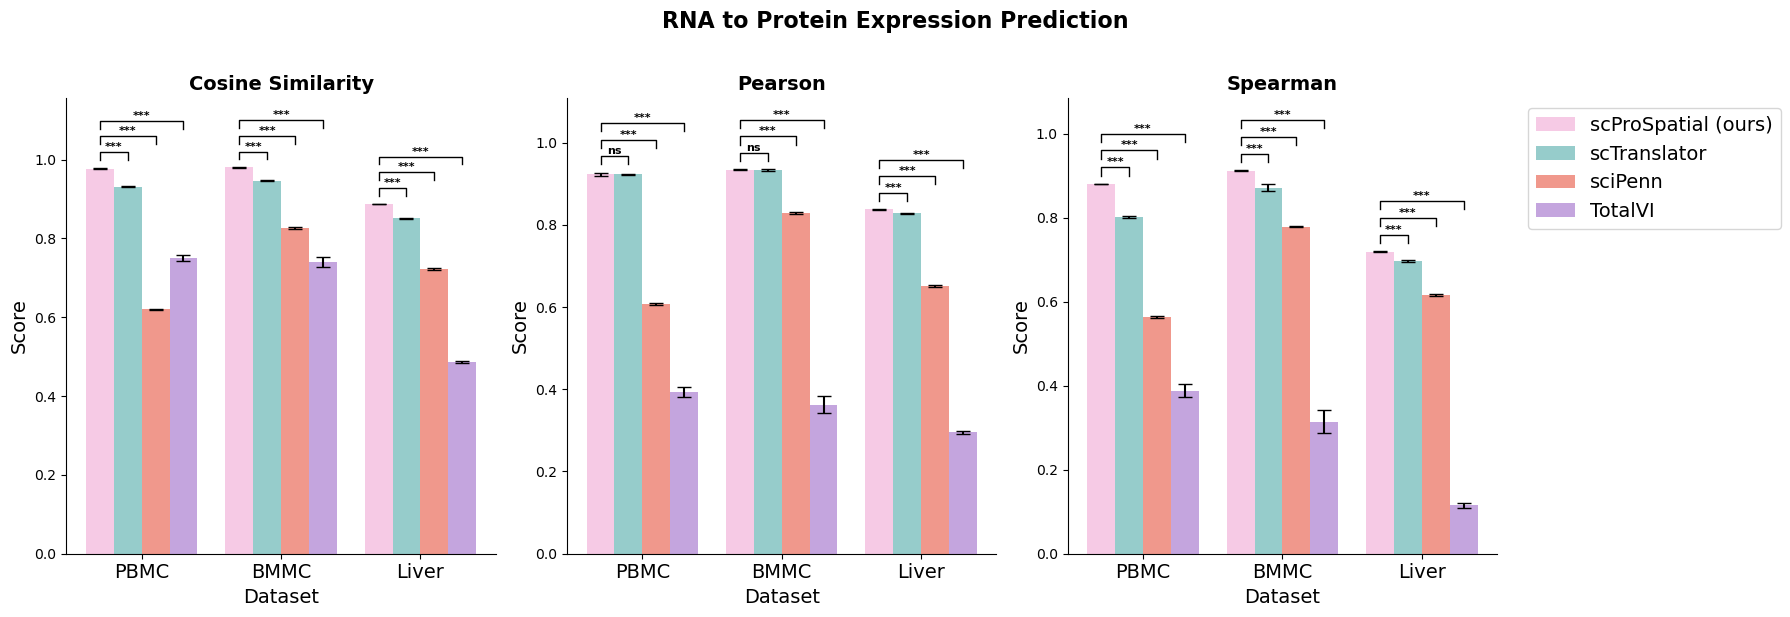


Summary Statistics by Method and Metric:

Cosine Similarity:
  scProSpatial (ours): 0.9481 ± 0.0432
  scTranslator: 0.9098 ± 0.0416
  sciPenn: 0.7224 ± 0.0841
  TotalVI: 0.6598 ± 0.1221

Pearson:
  scProSpatial (ours): 0.8980 ± 0.0432
  scTranslator: 0.8945 ± 0.0475
  sciPenn: 0.6956 ± 0.0958
  TotalVI: 0.3504 ± 0.0412

Spearman:
  scProSpatial (ours): 0.8371 ± 0.0844
  scTranslator: 0.7903 ± 0.0719
  sciPenn: 0.6533 ± 0.0910
  TotalVI: 0.2727 ± 0.1151


Statistical Comparison (p-values from t-tests):
Comparing scProSpatial (ours) vs other methods:

Cosine Similarity:
  PBMC:
    vs scTranslator: p = 0.000000 ***
    vs sciPenn: p = 0.000000 ***
    vs TotalVI: p = 0.000000 ***
  BMMC:
    vs scTranslator: p = 0.000000 ***
    vs sciPenn: p = 0.000000 ***
    vs TotalVI: p = 0.000000 ***
  Liver:
    vs scTranslator: p = 0.000000 ***
    vs sciPenn: p = 0.000000 ***
    vs TotalVI: p = 0.000000 ***

Pearson:
  PBMC:
    vs scTranslator: p = 0.992546 ns
    vs sciPenn: p = 0.000000 ***

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Read data from CSV file
df = pd.read_csv('/raid/home/yoyowu/scProSpatial/notebooks/benchmark_results_rand_4methods.csv')


print("Data loaded from CSV:")
print(f"Shape: {df.shape}")
print(f"Methods: {df['Method'].unique()}")
print(f"Datasets: {df['Dataset'].unique()}")
print(f"Metrics: {[col for col in df.columns if col not in ['Method', 'Dataset', 'Run']]}")

# Function to get metric data from CSV
def get_metric_data_from_csv(method, dataset, metric):
    """Extract metric values for a specific method and dataset from CSV"""
    subset = df[(df['Method'] == method) & (df['Dataset'] == dataset)]
    return subset[metric].values

# Define methods and datasets (matching CSV data)
methods = ['SpatialPro', 'scTranslator', 'sciPenn', 'TotalVI']
datasets = ['PBMC', 'BMMC', 'Liver']
metrics = ['Cosine', 'Pearson', 'Spearman']

# Define your specified colors
colors = ['#f6cae5', '#96cccb', '#f0988c', '#c4a5de']

# Calculate means and standard errors for each method, dataset, and metric
metric_display_names = {'Cosine': 'Cosine Similarity', 'Pearson': 'Pearson', 'Spearman': 'Spearman'}
summary_data = {}

for method in methods:
    summary_data[method] = {}
    for dataset in datasets:
        summary_data[method][dataset] = {}
        for metric in metrics:
            values = get_metric_data_from_csv(method, dataset, metric)
            summary_data[method][dataset][metric] = {
                'mean': np.mean(values), 
                'std': np.std(values),
                'values': values
            }

def add_significance_bracket(ax, x1, x2, y, p_val, height_offset=0.02):
    """Add significance bracket between two bars"""
    # Determine significance level
    if p_val < 0.001:
        sig_text = "***"
    elif p_val < 0.01:
        sig_text = "**"
    elif p_val < 0.05:
        sig_text = "*"
    else:
        sig_text = "ns"
    
    # Draw the bracket
    ax.plot([x1, x1, x2, x2], [y, y + height_offset, y + height_offset, y], 
            color='black', linewidth=1)
    
    # Add significance text
    ax.text((x1 + x2) / 2, y + height_offset, sig_text, 
            ha='center', va='bottom', fontsize=8, fontweight='bold')

# Calculate p-values comparing SpatialPro vs other methods
def calculate_pvalues():
    pvalues = {}
    for metric in metrics:
        pvalues[metric] = {}
        for dataset in datasets:
            pvalues[metric][dataset] = {}
            # Get SpatialPro data for this metric and dataset
            spatialpro_data = get_metric_data_from_csv('SpatialPro', dataset, metric)
            
            for method in ['scTranslator', 'sciPenn', 'TotalVI']:
                other_data = get_metric_data_from_csv(method, dataset, metric)
                
                # Perform t-test
                t_stat, p_value = stats.ttest_ind(spatialpro_data, other_data)
                pvalues[metric][dataset][method] = p_value
    
    return pvalues

pvalues = calculate_pvalues()

# Create the bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('RNA to Protein Expression Prediction', 
             fontsize=16, fontweight='bold', y=1.02)

# Update method names for display
display_methods = ['scProSpatial (ours)', 'scTranslator', 'sciPenn', 'TotalVI']
method_mapping = dict(zip(methods, display_methods))

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    # Prepare data for this metric
    x = np.arange(len(datasets))
    width = 0.2
    
    # Store bar information for significance brackets
    bar_info = {}
    
    for j, method in enumerate(methods):
        means = [summary_data[method][dataset][metric]['mean'] for dataset in datasets]
        stds = [summary_data[method][dataset][metric]['std'] for dataset in datasets]
        
        # Create bars with error bars
        bars = ax.bar(x + j*width, means, width, yerr=stds, 
                     label=method_mapping[method], color=colors[j], capsize=5, 
                     edgecolor='none', alpha=1.0)
        
        # Store bar positions and heights for significance brackets
        for k, (bar, dataset) in enumerate(zip(bars, datasets)):
            if dataset not in bar_info:
                bar_info[dataset] = {}
            bar_info[dataset][method] = {
                'x': bar.get_x() + bar.get_width()/2,
                'height': bar.get_height() + stds[k]
            }
    
    # Add significance brackets
    for k, dataset in enumerate(datasets):
        spatialpro_x = bar_info[dataset]['SpatialPro']['x']
        spatialpro_height = bar_info[dataset]['SpatialPro']['height']
        
        bracket_y_offset = 0
        for method in ['scTranslator', 'sciPenn', 'TotalVI']:
            other_x = bar_info[dataset][method]['x']
            other_height = bar_info[dataset][method]['height']
            
            # Use the higher of the two bars as the bracket base
            bracket_y = max(spatialpro_height, other_height) + 0.02 + bracket_y_offset
            
            p_val = pvalues[metric][dataset][method]
            add_significance_bracket(ax, spatialpro_x, other_x, bracket_y, p_val)
            
            # Offset subsequent brackets to avoid overlap
            bracket_y_offset += 0.04                      
   
    ax.set_title(f'{metric_display_names[metric]}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Dataset', fontsize=14)
    ax.set_ylabel('Score', fontsize=14)
    ax.set_xticks(x + width * 1.5)
    ax.set_xticklabels(datasets, fontsize=14)
    
    # Remove grid and half frame
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Only show legend on the last plot
    if i == 2:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('rna_protein_benchmark_bars.png', dpi=300, bbox_inches='tight')

# Print summary statistics
print("\nSummary Statistics by Method and Metric:")
print("="*60)
for metric in metrics:
    print(f"\n{metric_display_names[metric]}:")
    for method in methods:
        overall_means = [summary_data[method][dataset][metric]['mean'] for dataset in datasets]
        print(f"  {method_mapping[method]}: {np.mean(overall_means):.4f} ± {np.std(overall_means):.4f}")

# Print p-values
print("\n\nStatistical Comparison (p-values from t-tests):")
print("="*60)
print("Comparing scProSpatial (ours) vs other methods:")

for metric in metrics:
    print(f"\n{metric_display_names[metric]}:")
    for dataset in datasets:
        print(f"  {dataset}:")
        for method in ['scTranslator', 'sciPenn', 'TotalVI']:
            p_val = pvalues[metric][dataset][method]
            significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
            print(f"    vs {method}: p = {p_val:.6f} {significance}")

print("\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")

# Create a summary table and save to CSV
summary_table = []
for method in methods:
    for dataset in datasets:
        row = {
            'Method': method_mapping[method],
            'Dataset': dataset
        }
        for metric in metrics:
            mean_val = summary_data[method][dataset][metric]['mean']
            std_val = summary_data[method][dataset][metric]['std']
            row[f'{metric_display_names[metric]}_Mean'] = mean_val
            row[f'{metric_display_names[metric]}_Std'] = std_val
            row[f'{metric_display_names[metric]}_Combined'] = f"{mean_val:.3f} ± {std_val:.3f}"
        summary_table.append(row)

summary_df = pd.DataFrame(summary_table)
# summary_df.to_csv('benchmark_summary_table.csv', index=False)
# print(f"\nSummary table saved to 'benchmark_summary_table.csv'")

# Print the summary table
print("\nSummary Table:")
print(summary_df[['Method', 'Dataset', 'Cosine Similarity_Combined', 'Pearson_Combined', 'Spearman_Combined']])

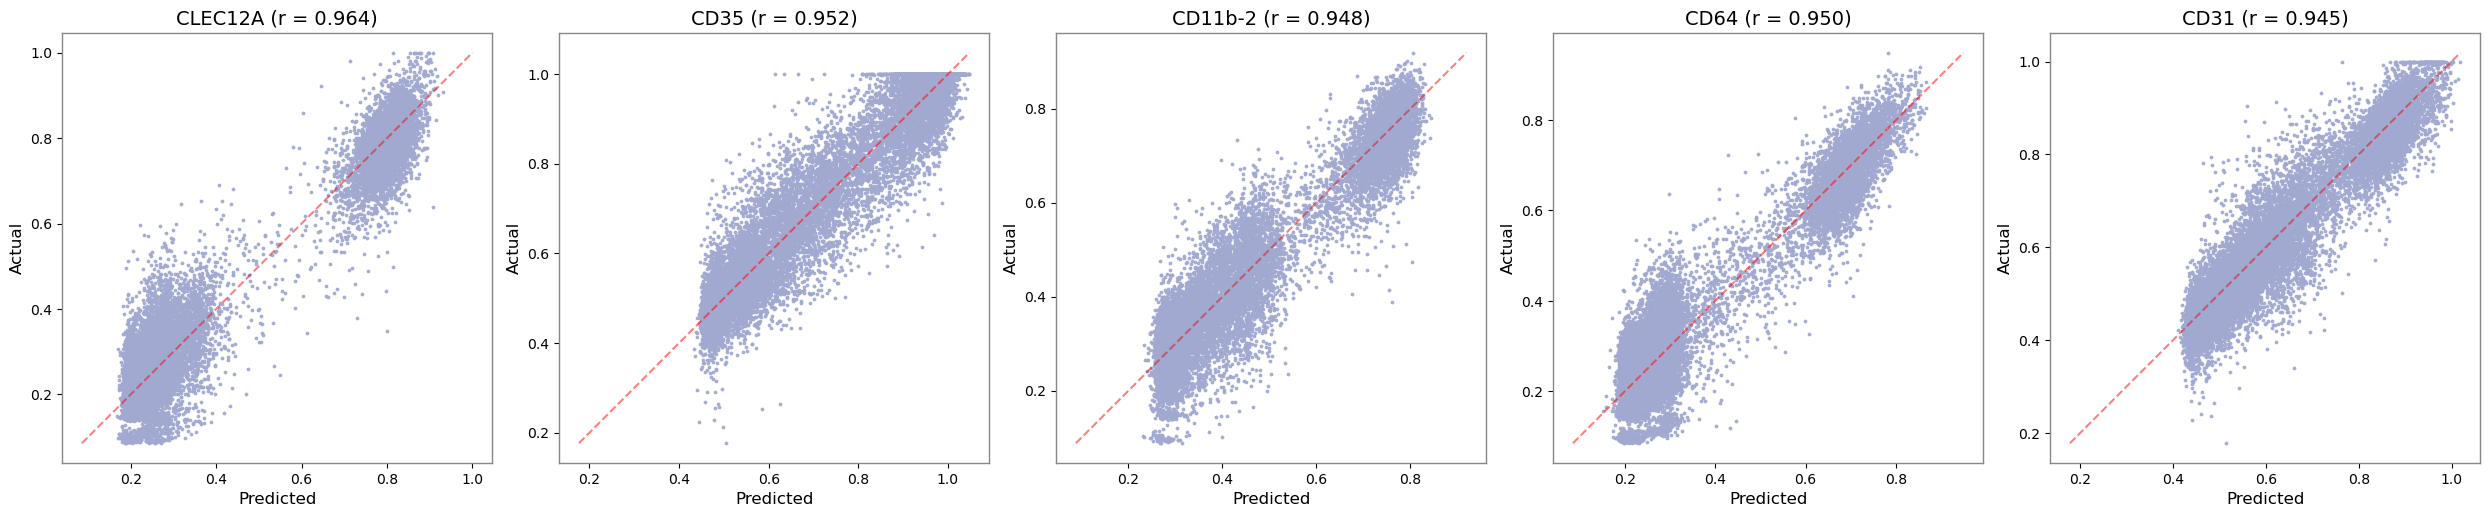

In [6]:
import scanpy as sc 
label_data = sc.read_h5ad("/raid/home/yoyowu/spatialpro/prediction/pbmc_protein_label_test.h5ad")
pred_data = sc.read_h5ad("/raid/home/yoyowu/spatialpro/prediction/pbmc_test.h5ad")


def normalization(x, low=1e-8, high=1):
    MIN = min(x)
    MAX = max(x)
    x = low + (x-MIN)/(MAX-MIN)*(high-low) # zoom to (low, high)
    return x

protein_names = label_data.var["Gene symbol"]
label_data_df = pd.DataFrame(label_data.X, columns=protein_names)
pred_data_df = pd.DataFrame(pred_data.obsm['protein_predicted'], columns=protein_names)

normalized_label_data = label_data_df.copy()
# row-wise normalization
for i in range(normalized_label_data.shape[0]):
    normalized_label_data.iloc[i, :] = normalization(label_data_df.iloc[i, :])



# Find the protein with highest correlation between predicted and actual values
all_proteins = list(protein_names)
correlations = {}

for protein in all_proteins:
    # Calculate correlation for each protein
    corr, pval = stats.pearsonr(pred_data_df[protein], normalized_label_data[protein])
    correlations[protein] = (corr, pval)

# Sort proteins by correlation value (descending)
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1][0], reverse=True)
# Get the top 10 proteins from the previously calculated correlations
top10_proteins = [protein for protein, _ in sorted_correlations[:5]]
top10_corrs = [corr for _, (corr, _) in sorted_correlations[:5]]

# Set the style parameters for more attractive plots
plt.rcParams.update({
    'axes.edgecolor': '#888888',  # Grey edge color for frames
    'axes.linewidth': 1.0,        # Frame line width
    'axes.grid': False,           # No grid
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans']
})

# Create a figure with subplots
fig, axes = plt.subplots(1, 5, figsize=(25, 10))
axes = axes.flatten()

# Plot each protein
for i, protein in enumerate(top10_proteins):
    # Get data for the current protein
    x = pred_data_df[protein]
    y = normalized_label_data[protein]
    
    # Create a mask to filter out data points with actual values below threshold
    mask = y > 0.05  # Only keep points where actual value > 0.05
    
    # Apply the mask to both x and y
    filtered_x = x[mask]
    filtered_y = y[mask]
    
    # Create scatter plot with filtered data
    axes[i].scatter(filtered_x, filtered_y, color='#a1a9d0', s=3, alpha=0.9)
    
    # Add correlation info to the title
    # We can recalculate correlation for filtered data if needed
    filtered_corr = np.corrcoef(filtered_x, filtered_y)[0, 1]
    axes[i].set_title(f'{protein} (r = {filtered_corr:.3f})', fontsize=14)
    
    # Add labels
    axes[i].set_xlabel('Predicted', fontsize=12)
    axes[i].set_ylabel('Actual', fontsize=12)
    
    # Add unity line
    min_val = min(filtered_x.min(), filtered_y.min())
    max_val = max(filtered_x.max(), filtered_y.max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.5)
    
    # Set equal aspect ratio
    axes[i].set_aspect('equal', adjustable='box')
    
    # # Optional: Set consistent axis limits
    # axes[i].set_xlim(0.0, 1.0)
    # axes[i].set_ylim(0.0, 1.0)
    
    # Set grey spines (frame) for all sides
    for spine in axes[i].spines.values():
        spine.set_color('#888888')


plt.tight_layout()
plt.show()


# fig.savefig("/raid/home/yoyowu/spatialpro/plots/pbmc_top5_proteins_correlation_filtered.png", dpi=300, bbox_inches='tight')